In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold          
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from lightgbm import LGBMRegressor


1.LOAD THE DATA


In [38]:
# Load the train 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')



2.EXPLORING THE DATA

In [39]:
# Display the first few rows of the datasets to understand their structure
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
pd.set_option('display.max_columns', None)

In [41]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [42]:
rows=len(train_df.axes[0])
cols=len(train_df.axes[1])

rows,cols

(1460, 81)

In [43]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [44]:
train_df.shape

(1460, 81)

In [45]:
with open('data_info.txt', 'w') as f:
    train_df.info(buf=f, verbose=True)

In [46]:
non_null_counts=train_df.notnull().sum()
# Filter columns with non-null counts less than total rows
columns_with_missing_data = non_null_counts[non_null_counts < rows]

for column, count in columns_with_missing_data.items():
    print(f"{column}: {count} non-null entries")

LotFrontage: 1201 non-null entries
Alley: 91 non-null entries
MasVnrType: 588 non-null entries
MasVnrArea: 1452 non-null entries
BsmtQual: 1423 non-null entries
BsmtCond: 1423 non-null entries
BsmtExposure: 1422 non-null entries
BsmtFinType1: 1423 non-null entries
BsmtFinType2: 1422 non-null entries
Electrical: 1459 non-null entries
FireplaceQu: 770 non-null entries
GarageType: 1379 non-null entries
GarageYrBlt: 1379 non-null entries
GarageFinish: 1379 non-null entries
GarageQual: 1379 non-null entries
GarageCond: 1379 non-null entries
PoolQC: 7 non-null entries
Fence: 281 non-null entries
MiscFeature: 54 non-null entries


In [47]:
# Display column names and their non-null counts
for column, count in columns_with_missing_data.items():
    null_values=rows-count
    dtype = train_df[column].dtype
    print(f"{column}: {null_values} null entries, dtype={dtype}")


LotFrontage: 259 null entries, dtype=float64
Alley: 1369 null entries, dtype=object
MasVnrType: 872 null entries, dtype=object
MasVnrArea: 8 null entries, dtype=float64
BsmtQual: 37 null entries, dtype=object
BsmtCond: 37 null entries, dtype=object
BsmtExposure: 38 null entries, dtype=object
BsmtFinType1: 37 null entries, dtype=object
BsmtFinType2: 38 null entries, dtype=object
Electrical: 1 null entries, dtype=object
FireplaceQu: 690 null entries, dtype=object
GarageType: 81 null entries, dtype=object
GarageYrBlt: 81 null entries, dtype=float64
GarageFinish: 81 null entries, dtype=object
GarageQual: 81 null entries, dtype=object
GarageCond: 81 null entries, dtype=object
PoolQC: 1453 null entries, dtype=object
Fence: 1179 null entries, dtype=object
MiscFeature: 1406 null entries, dtype=object


In [48]:
# Provided missing values
missing_values_dict = {
    'LotFrontage': 259,
    'Alley': 1369,
    'MasVnrType': 872,
    'MasVnrArea': 8,
    'BsmtQual': 37,
    'BsmtCond': 37,
    'BsmtExposure': 38,
    'BsmtFinType1': 37,
    'BsmtFinType2': 38,
    'Electrical': 1,
    'FireplaceQu': 690,
    'GarageType': 81,
    'GarageYrBlt': 81,
    'GarageFinish': 81,
    'GarageQual': 81,
    'GarageCond': 81,
    'PoolQC': 1453,
    'Fence': 1179,
    'MiscFeature': 1406
}

# Total number of entries in the dataset
total_entries = 1460

# Calculate the percentage of missing values for each feature
missing_percentage = {feature: (count / total_entries) * 100 for feature, count in missing_values_dict.items()}
missing_percentage

{'LotFrontage': 17.73972602739726,
 'Alley': 93.76712328767123,
 'MasVnrType': 59.726027397260275,
 'MasVnrArea': 0.547945205479452,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'Electrical': 0.0684931506849315,
 'FireplaceQu': 47.26027397260274,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525,
 'PoolQC': 99.52054794520548,
 'Fence': 80.75342465753424,
 'MiscFeature': 96.30136986301369}

In [49]:
# Identify features with more than 50% missing values
high_missing_features = {feature: pct for feature, pct in missing_percentage.items() if pct > 50}

high_missing_features


{'Alley': 93.76712328767123,
 'MasVnrType': 59.726027397260275,
 'PoolQC': 99.52054794520548,
 'Fence': 80.75342465753424,
 'MiscFeature': 96.30136986301369}

In [50]:
numerical_features = [features for features in train_df.columns if train_df[features].dtypes != 'O']
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

So we see that there are 38 features which are numerical.

Also we see that, some columns are having year.So we try to find out the fields which contain year information.As these will be used to calculate the age of house.

In [51]:
train_df[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [52]:
year_features = [features for features in numerical_features if "Yr" in features or "Year" in features]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<Axes: xlabel='YrSold'>

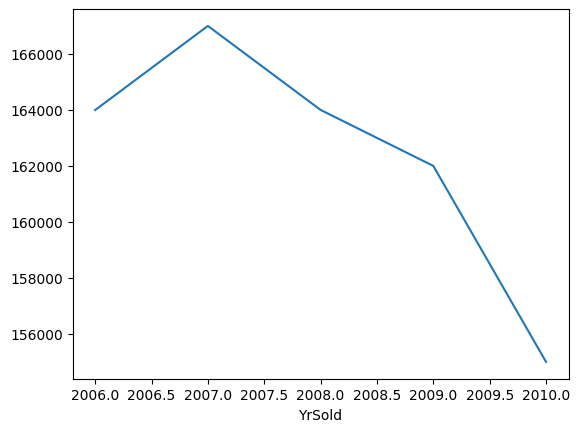

In [53]:
train_df.groupby('YrSold')['SalePrice'].median().plot()

We observe that the price is decresing as the years are more recent, which is very strange, so we look further

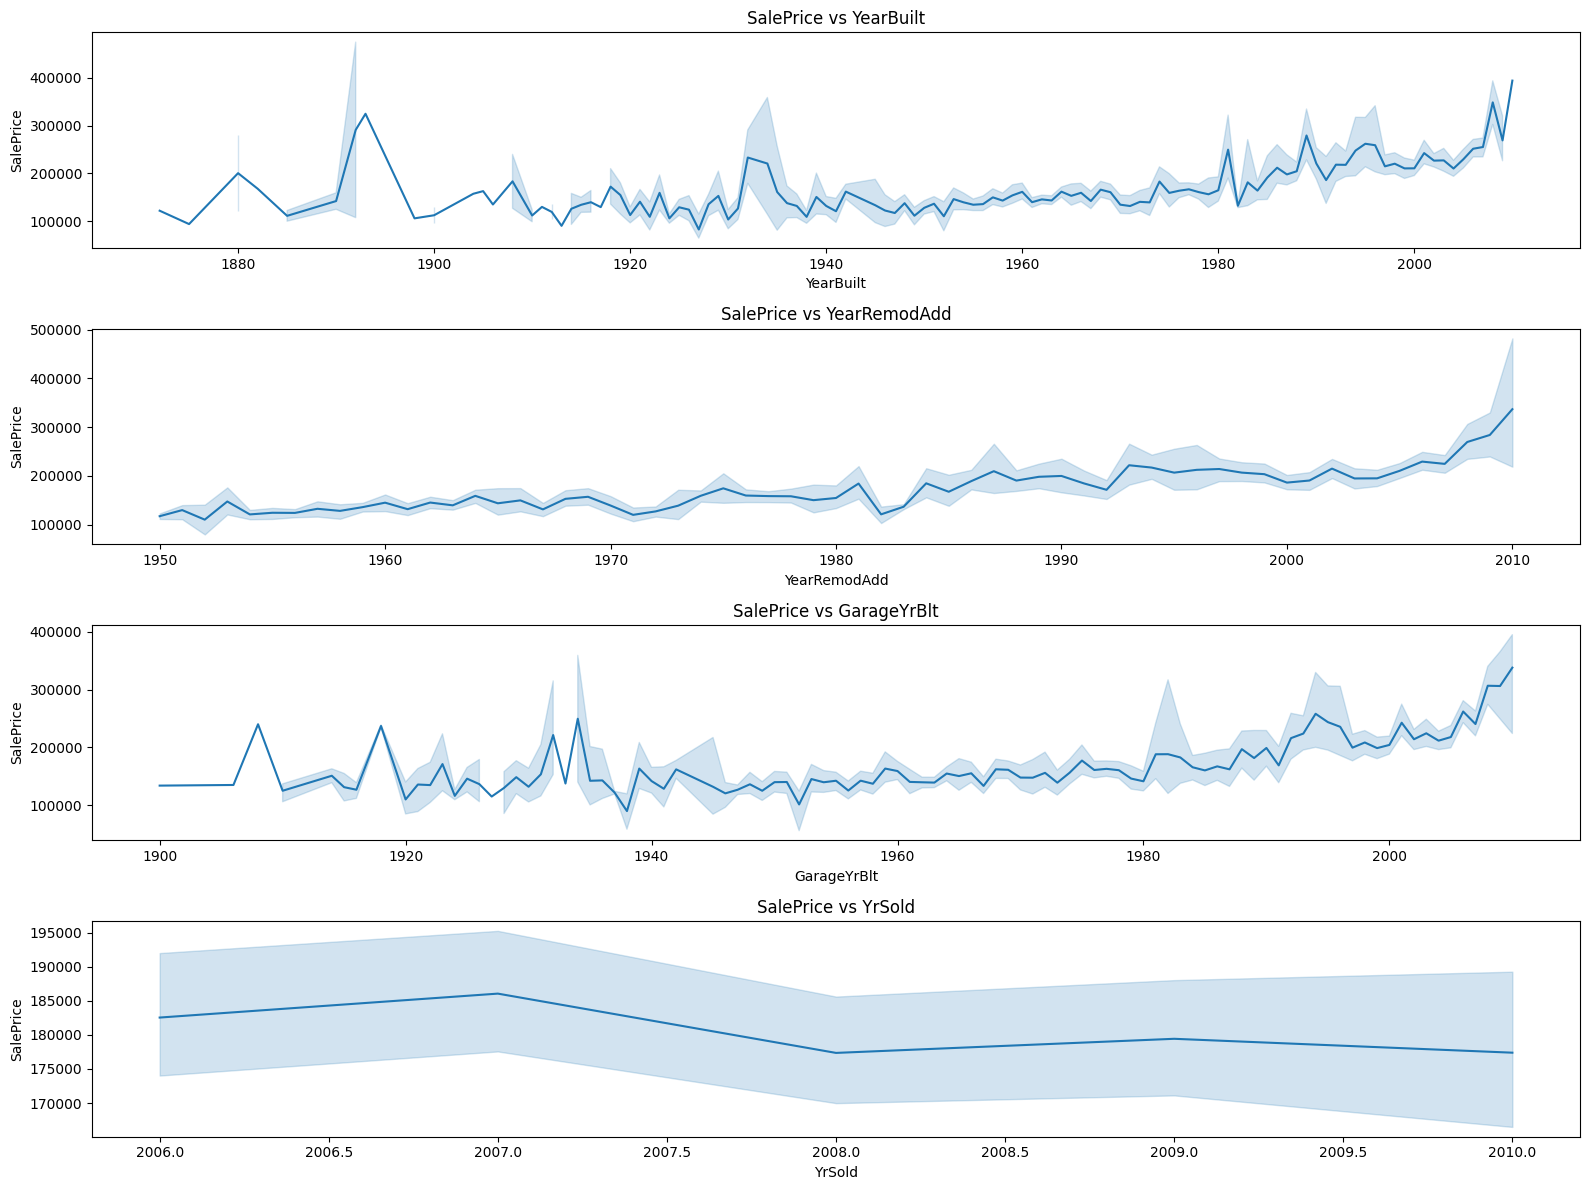

In [54]:
# Line plots for year features
plt.figure(figsize=(16, 12))
for i, col in enumerate(year_features, 1):
    plt.subplot(len(year_features), 1, i)
    sns.lineplot(x=train_df[col], y=train_df['SalePrice'])
    plt.title(f'SalePrice vs {col}')
plt.tight_layout()
plt.show()

Newer houses or houses that have been recently remodeled tend to have higher sale prices. This suggests that buyers value newer constructions and recent renovations.

The dip in SalePrice around 2008-2009 corresponds to the financial crisis, highlighting the influence of broader economic conditions on housing prices.

Older houses show more variability in prices, which could be due to a wide range of conditions, historical value, and renovation status.

Going on further, for numerical variables we observe that it can be of 2 types. Discrete and continous. If we take a limit of 25 distinct values as discreate variables, let us try to find the discrete variables.

In [55]:
discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique())<25 and feature not in year_features]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [56]:
train_df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


We see that ther are 17 discrete variables

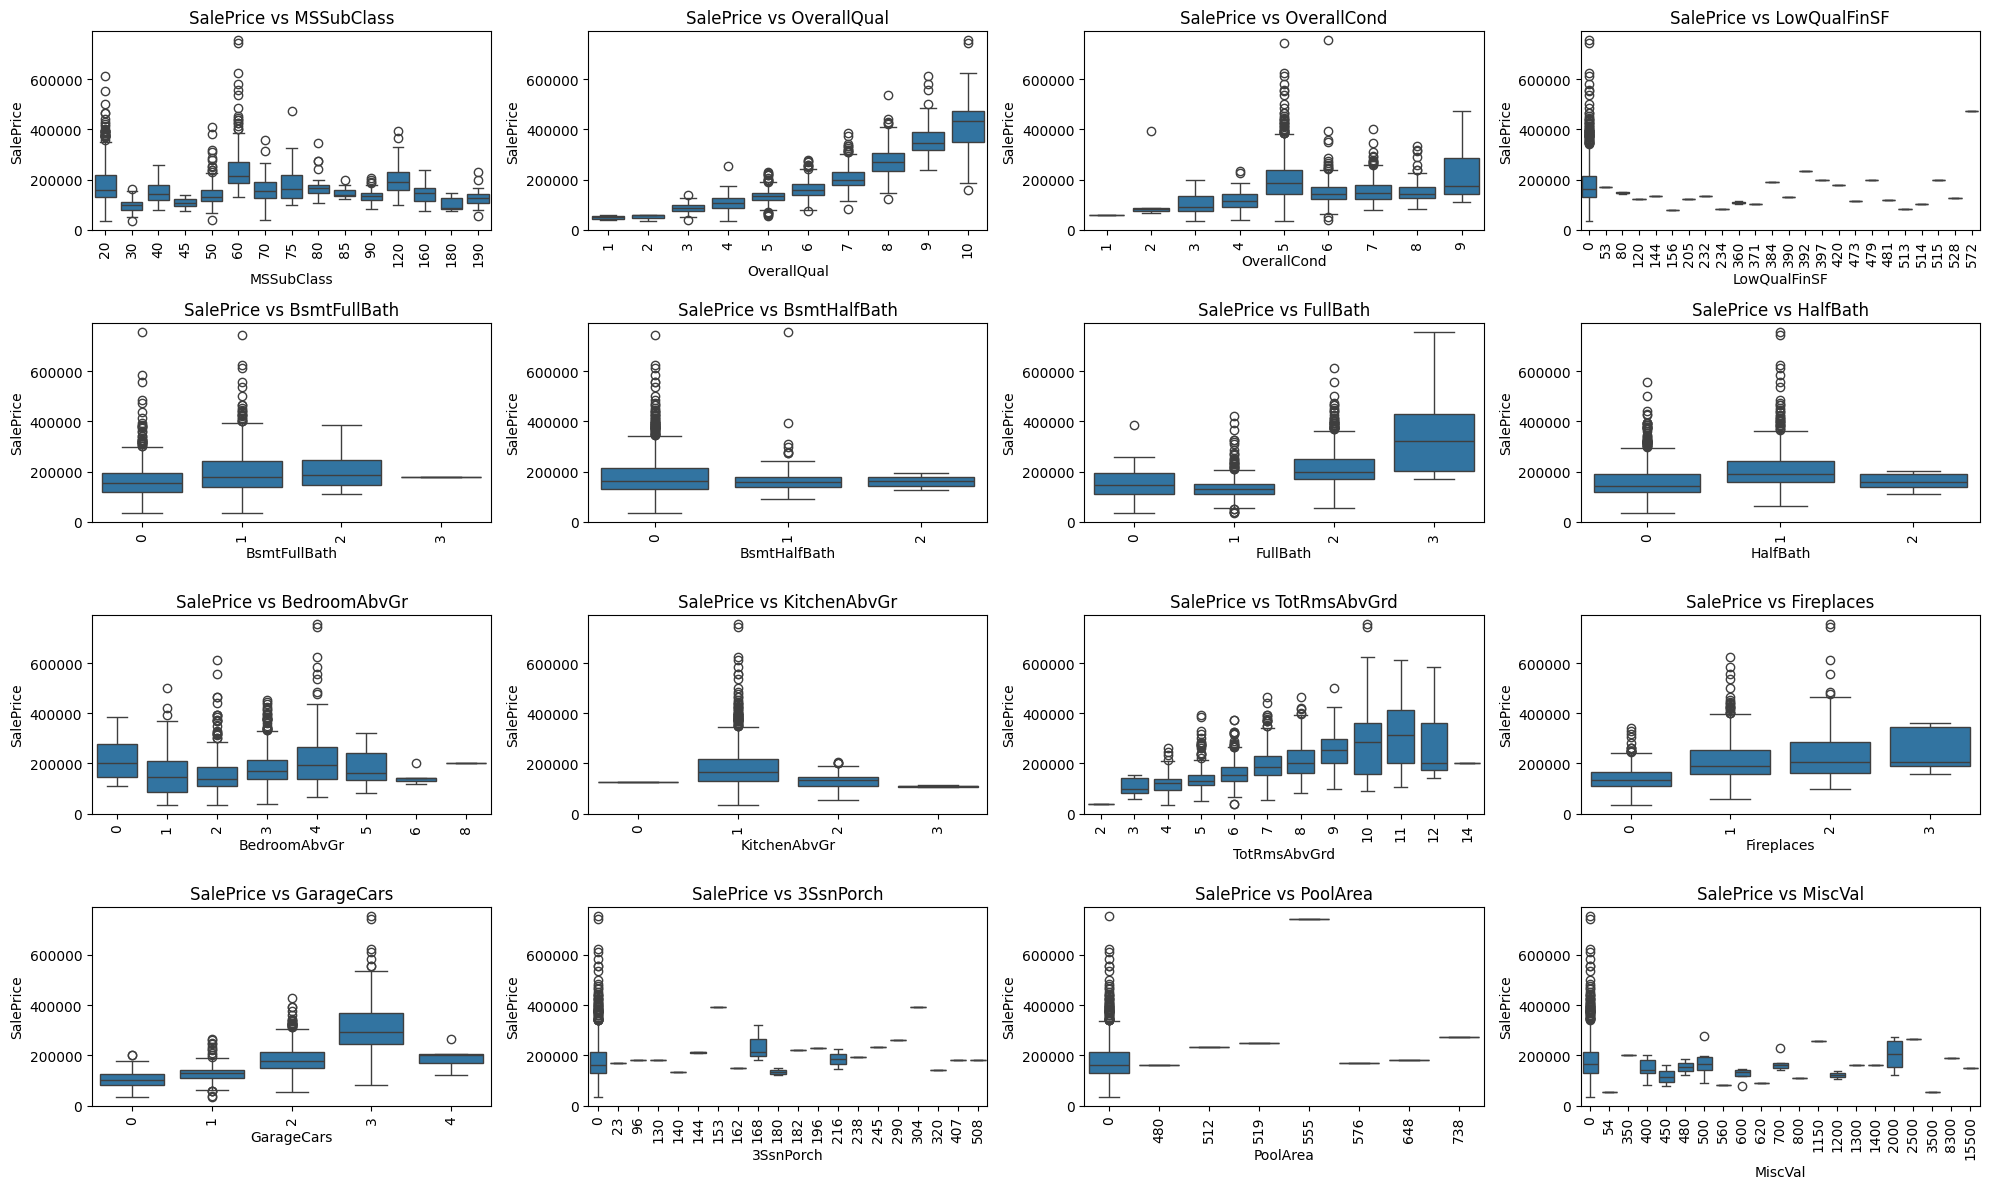

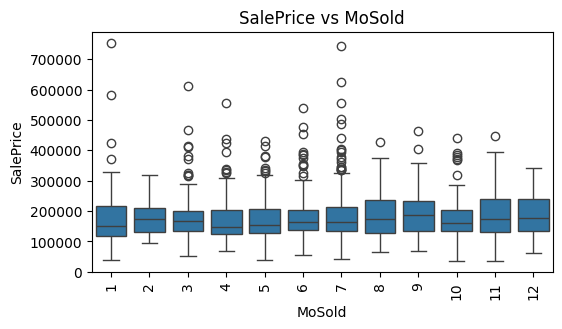

In [57]:
# Identify numerical features
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Identify discrete features
discrete_features = [feature for feature in numerical_features if len(train_df[feature].unique()) < 25 and feature not in year_features]

# Define the number of plots per page
plots_per_page = 16

# Calculate the number of pages needed
num_pages = (len(discrete_features) + plots_per_page - 1) // plots_per_page

# Plot each page
for page in range(num_pages):
    plt.figure(figsize=(20, 12))
    start = page * plots_per_page
    end = start + plots_per_page
    for i, col in enumerate(discrete_features[start:end], 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=train_df[col], y=train_df['SalePrice'])
        plt.title(f'SalePrice vs {col}')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Overall, features like OverallQual, TotRmsAbvGrd, GarageCars, FullBath, and Fireplaces show strong positive correlations with SalePrice, while features like LowQualFinSF, 3SsnPorch, MiscVal, and BedroomAbvGr show little to no significant impact.

Now we see the continous numerical features

In [58]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

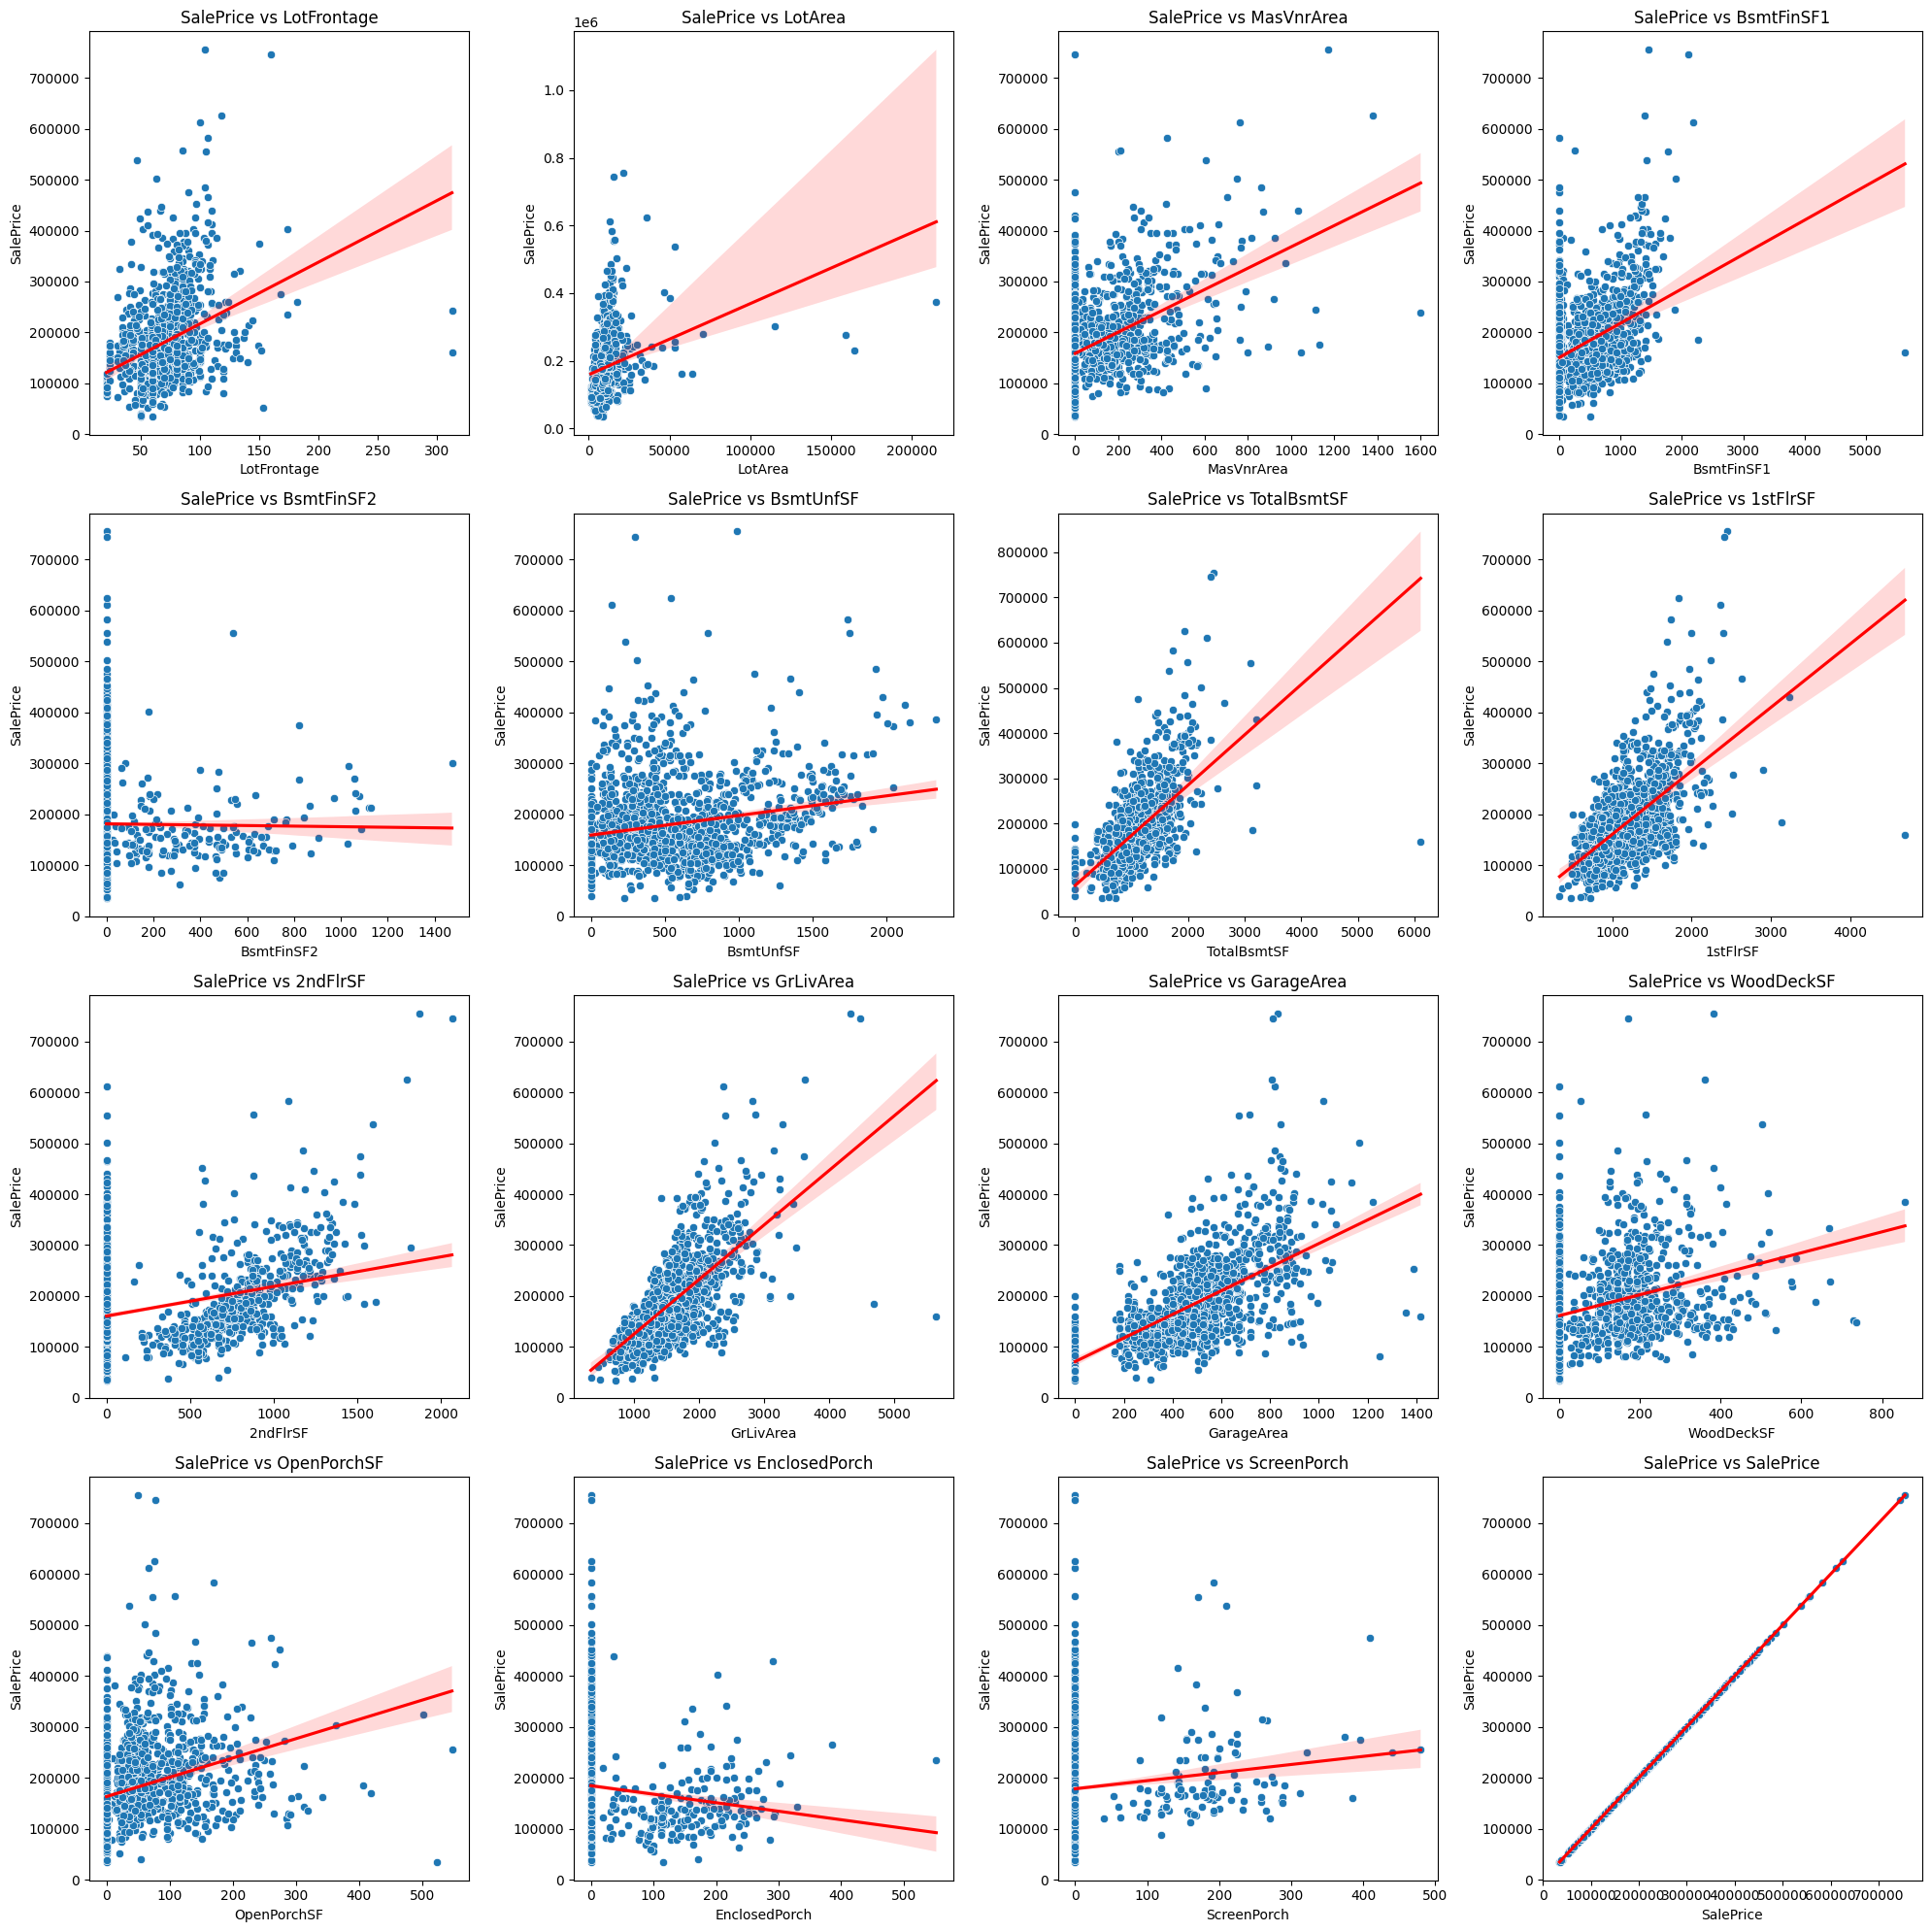

In [59]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(continous_features, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=train_df[col], y=train_df['SalePrice'])
    sns.regplot(x=train_df[col], y=train_df['SalePrice'], scatter=False, color='red')
    plt.title(f'SalePrice vs {col}')
plt.tight_layout()
plt.show()

Now we search for outliers

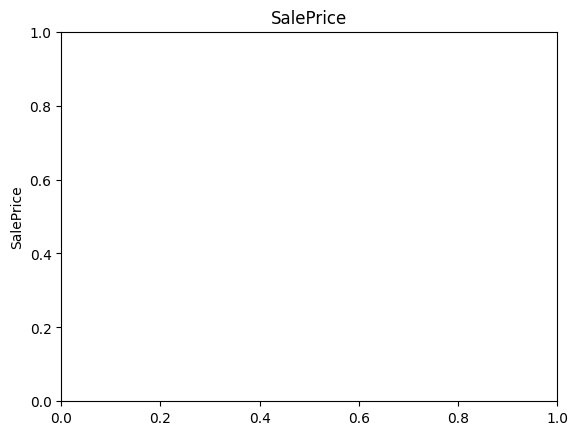

In [60]:
for feature in continous_features:
    data = train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #data.boxplot(column=feature)
        plt.ylabel(feature)
        #plt.ylabel('SalesPrice')
        plt.title(feature)

Now we go for categorical features

In [61]:
categorical_features =[feature for feature in train_df.columns if train_df[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [62]:
# Count of unique values for categorical features
categorical_features = train_df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"{col}: {train_df[col].nunique()} unique values")

MSZoning: 5 unique values
Street: 2 unique values
Alley: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 3 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 5 unique values
GarageType: 6 unique values
GarageFinish: 3 unique values
GarageQual: 5 unique values
Garag

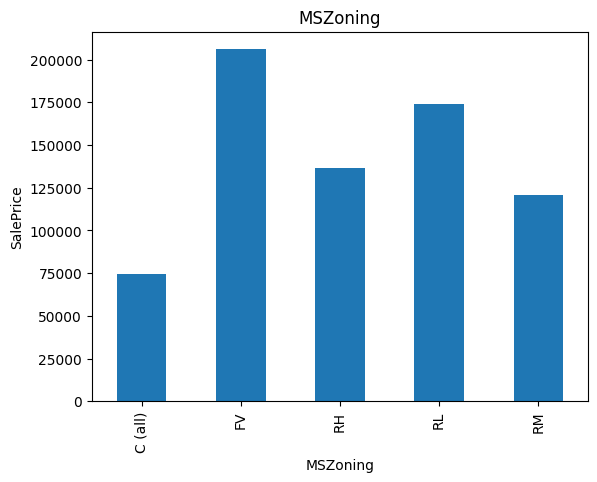

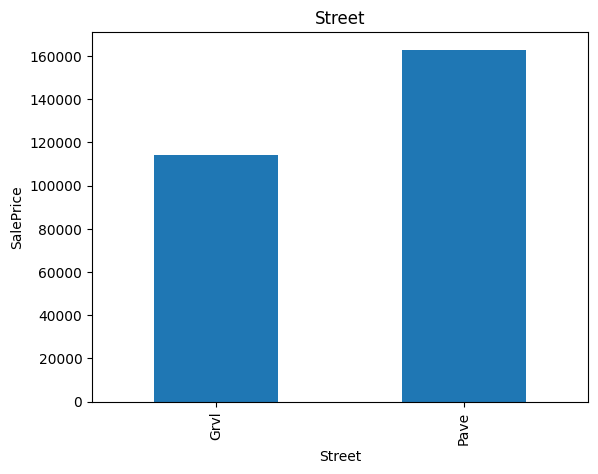

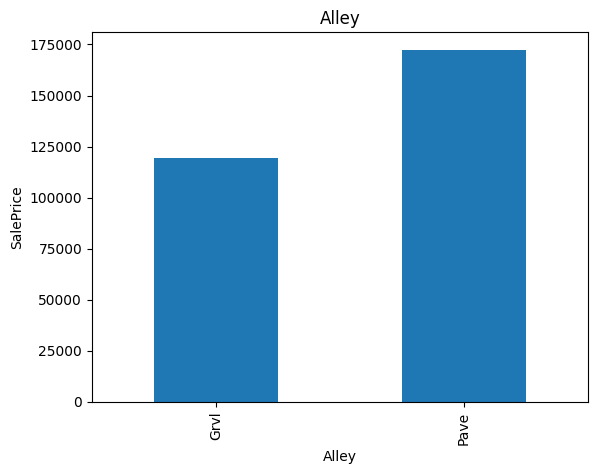

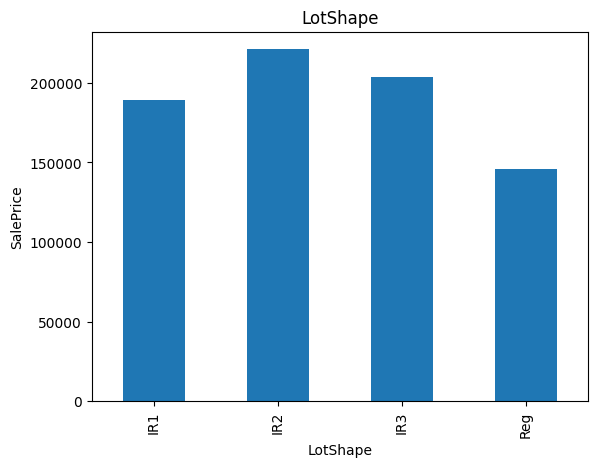

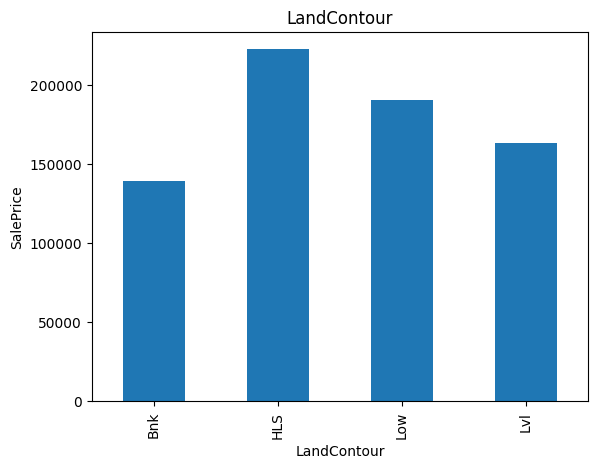

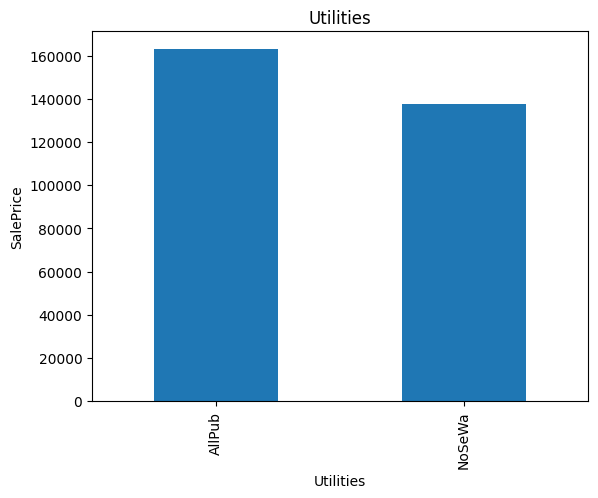

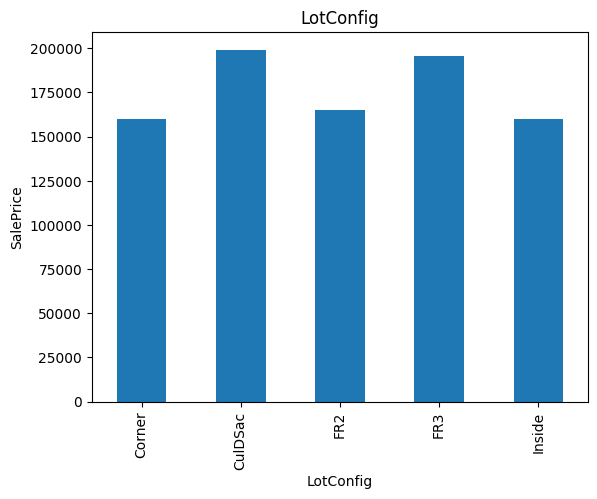

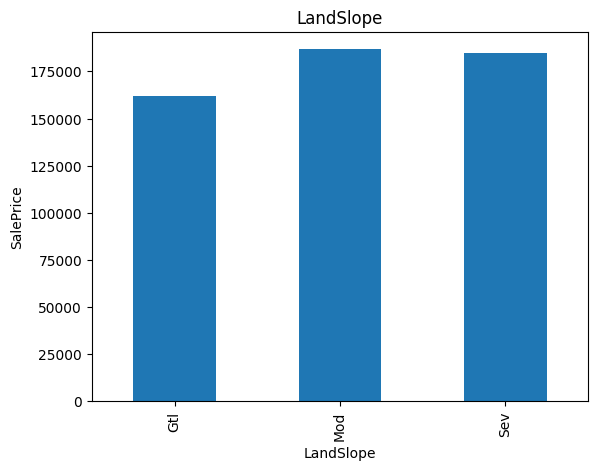

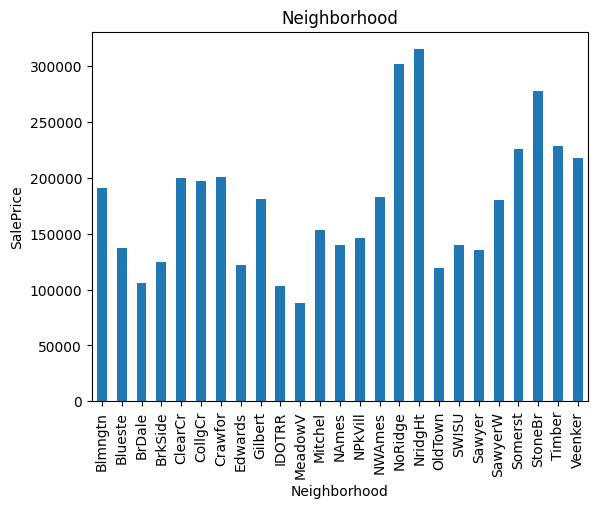

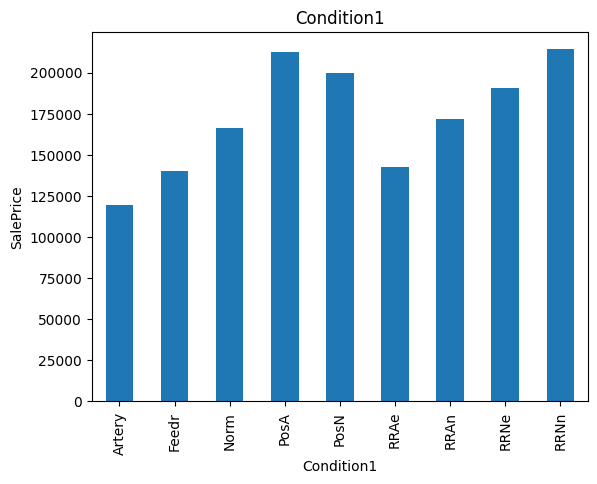

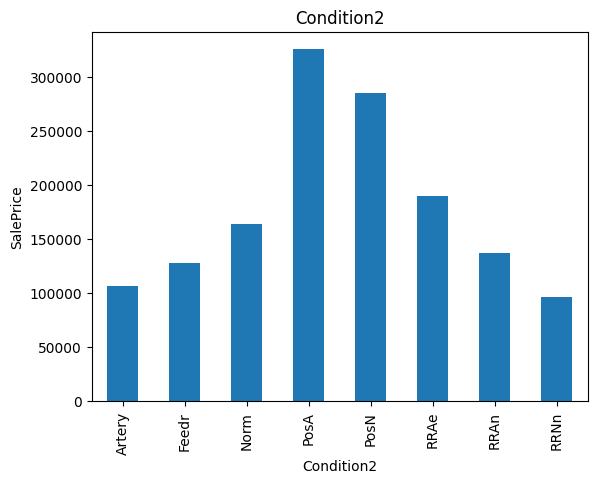

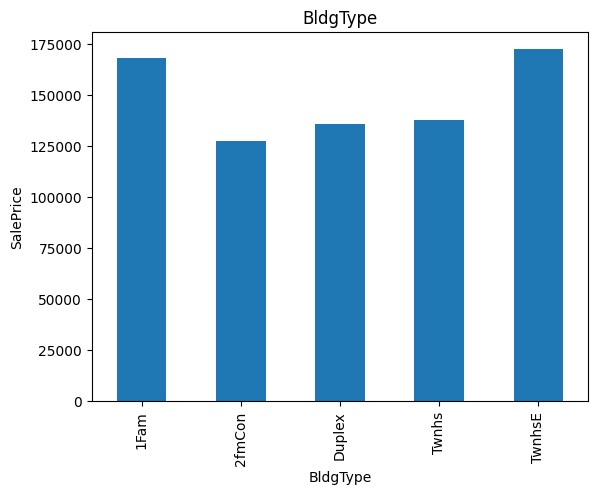

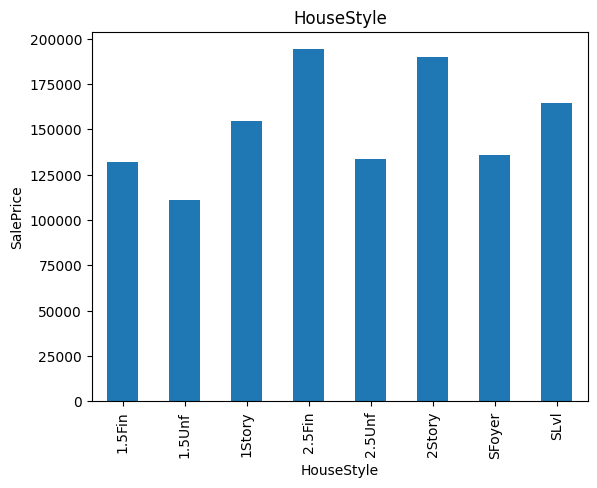

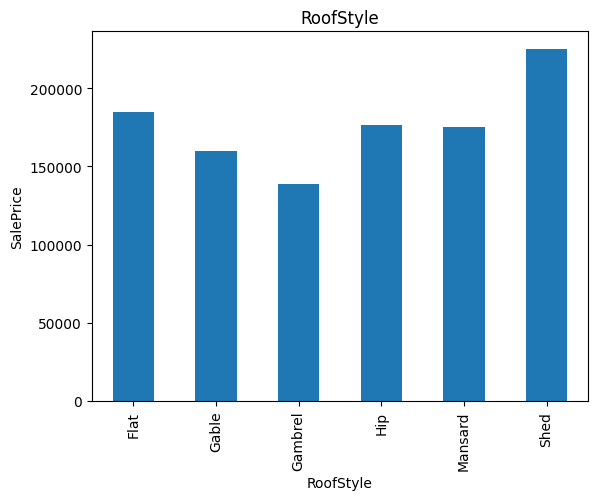

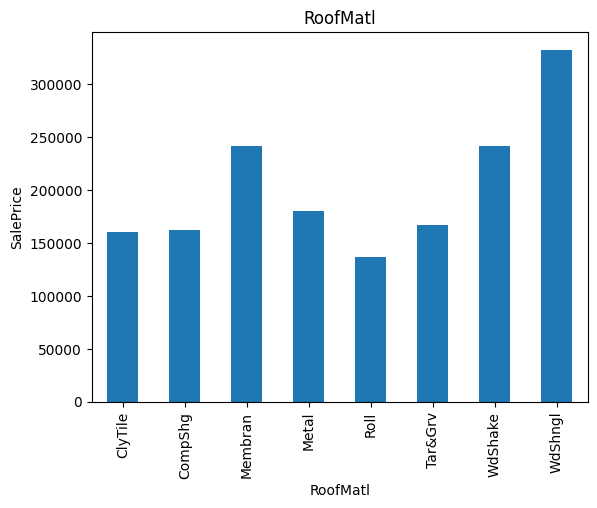

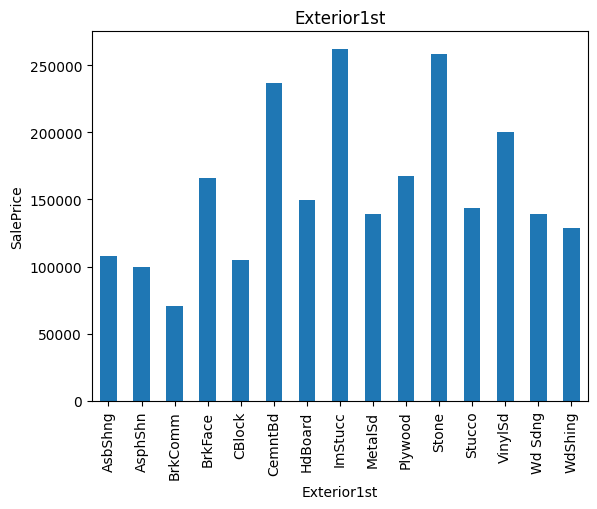

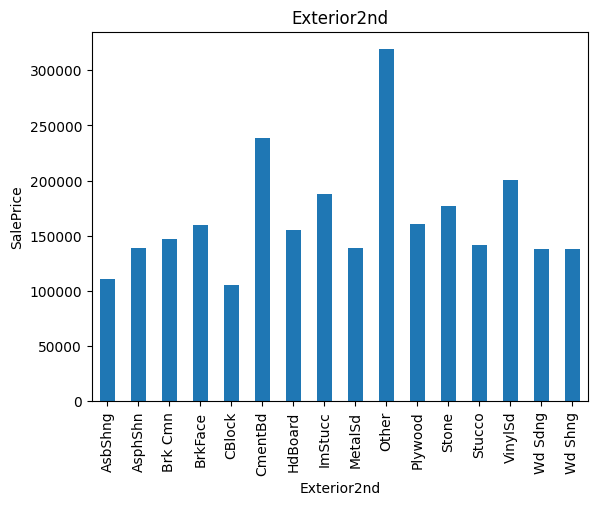

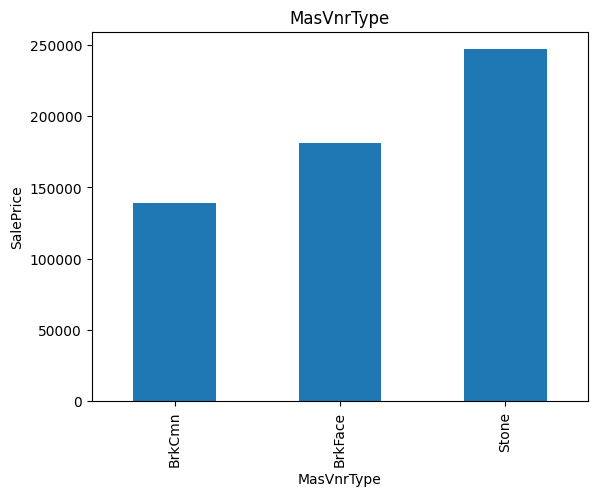

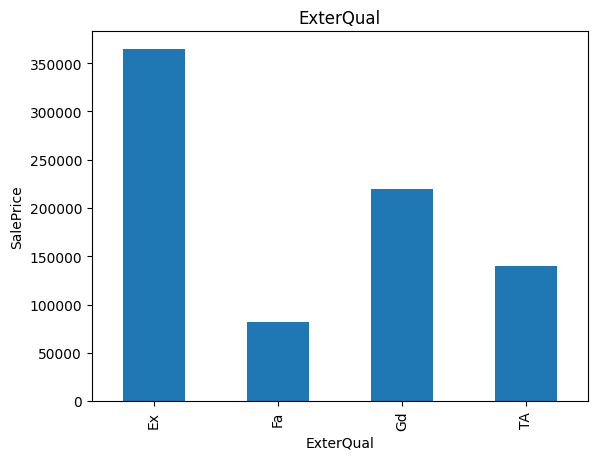

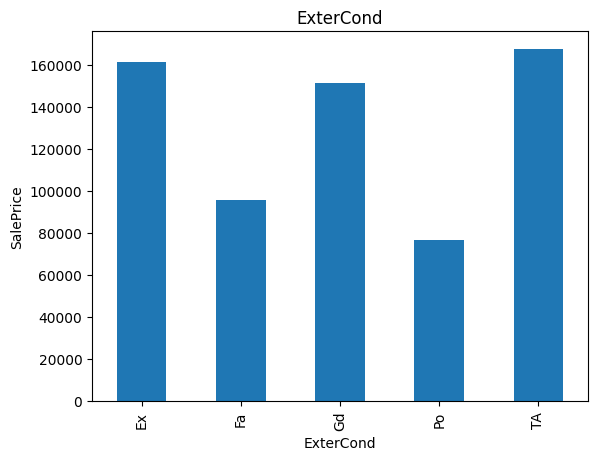

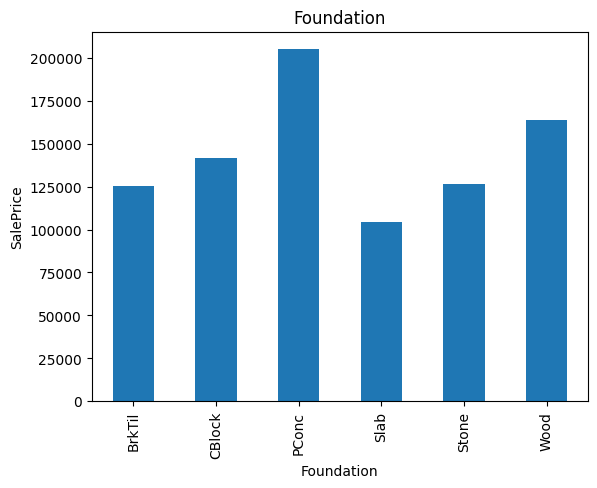

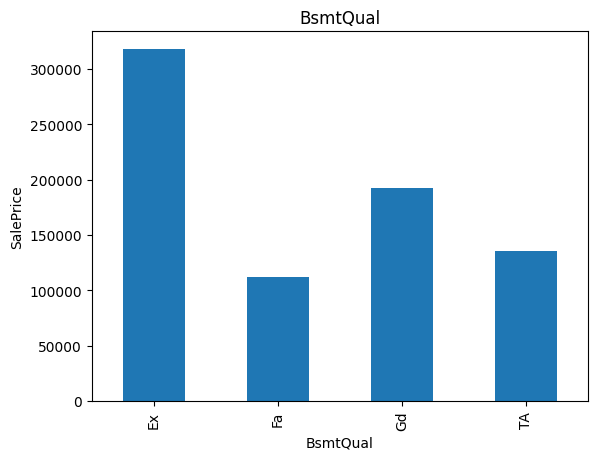

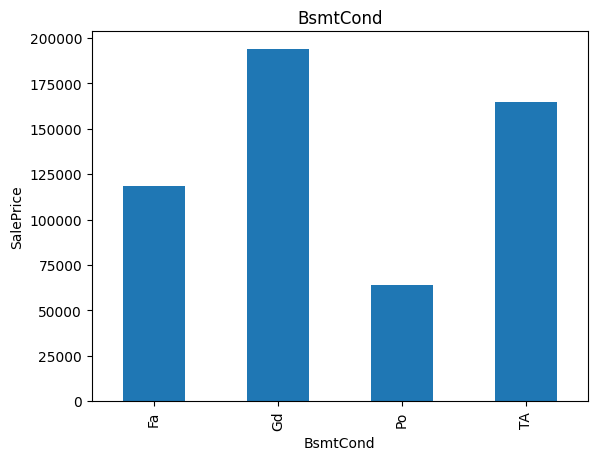

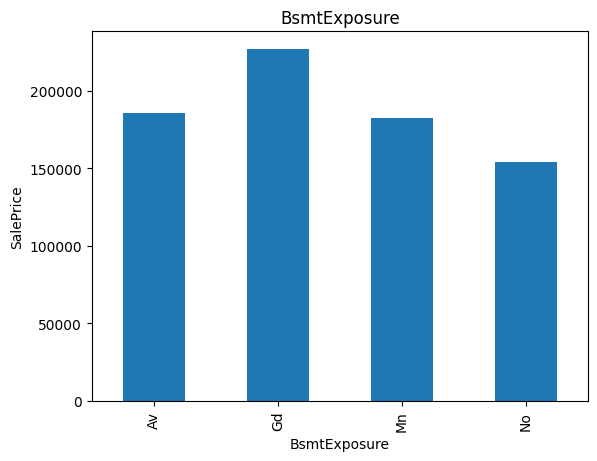

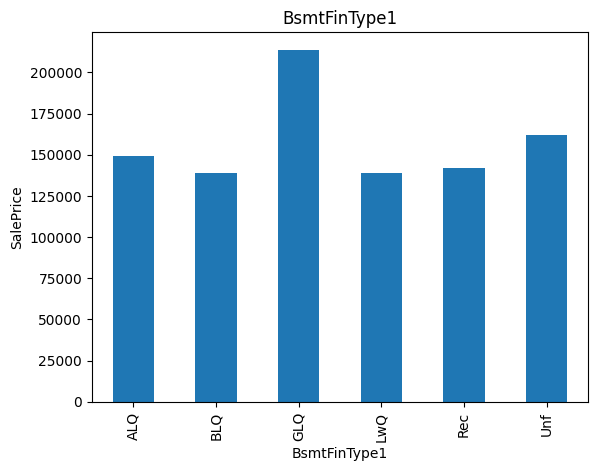

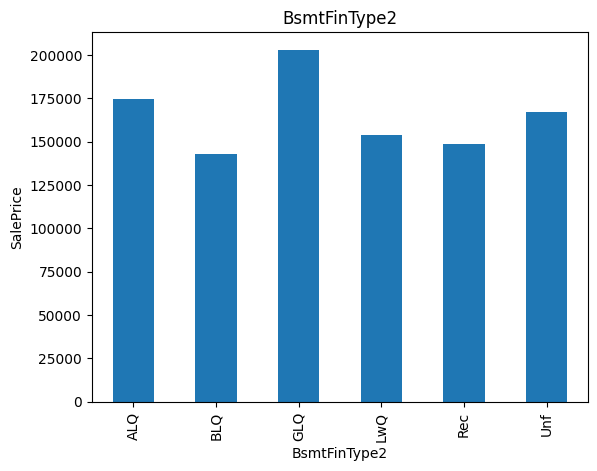

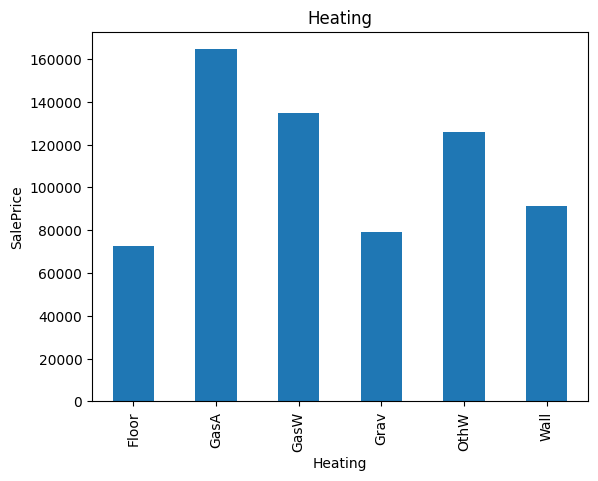

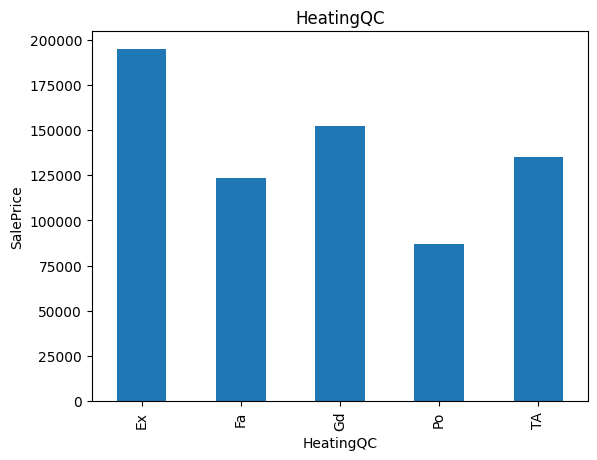

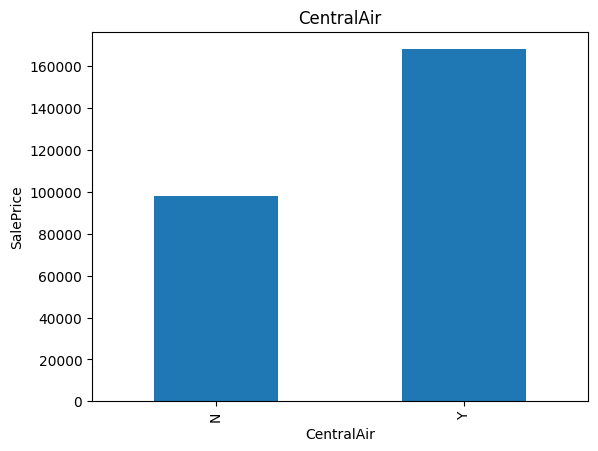

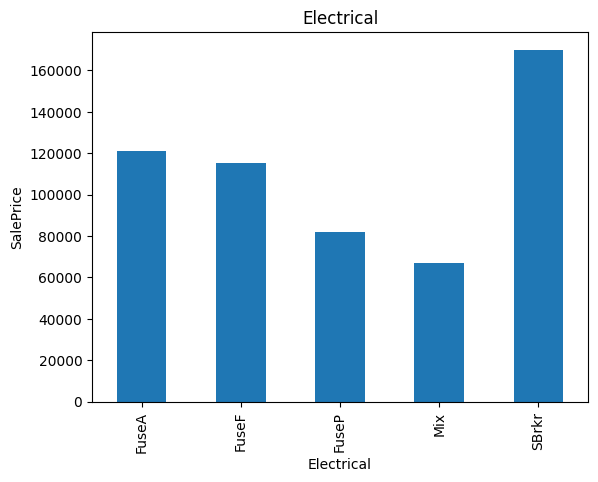

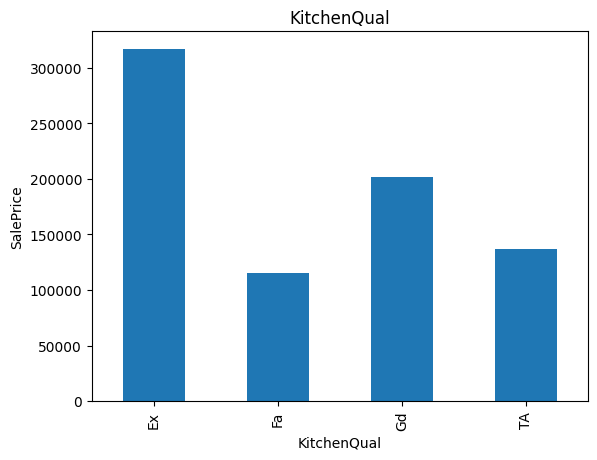

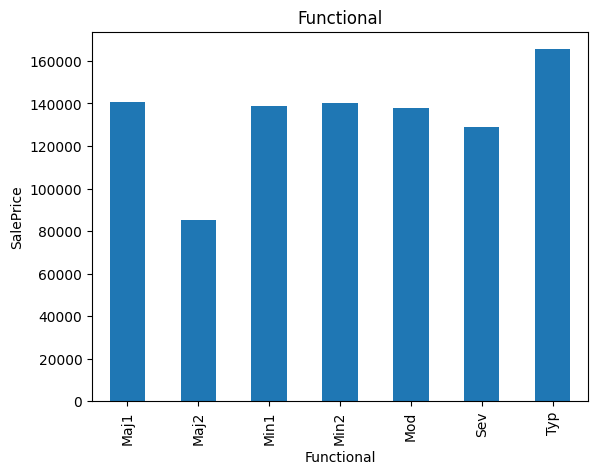

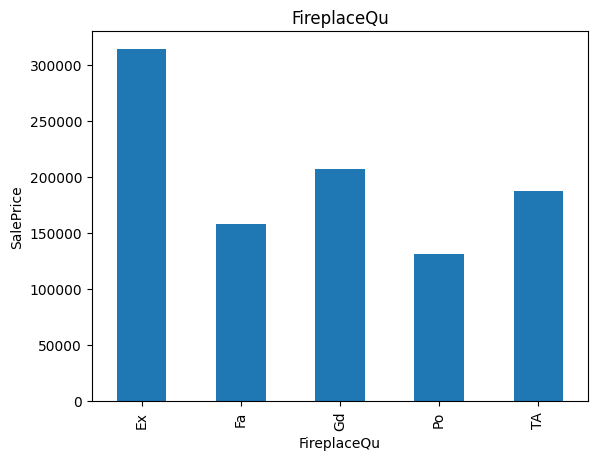

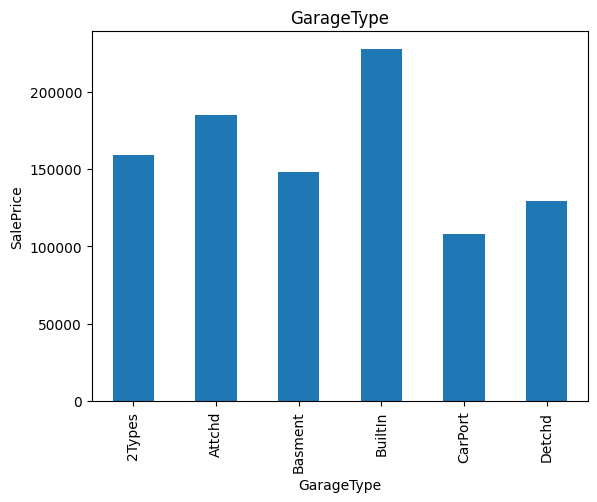

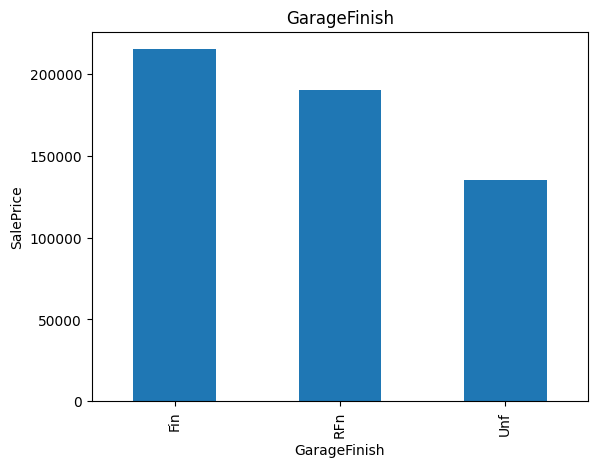

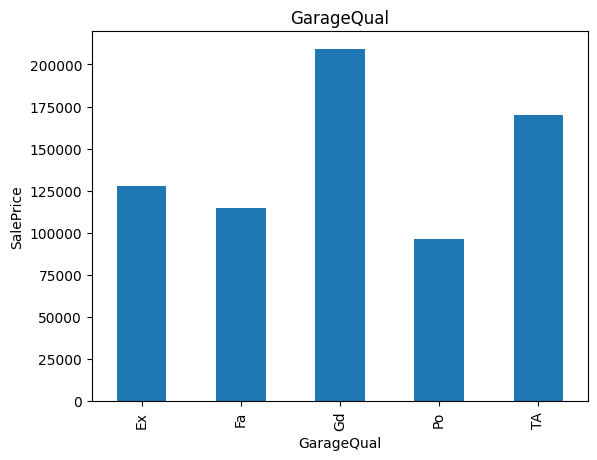

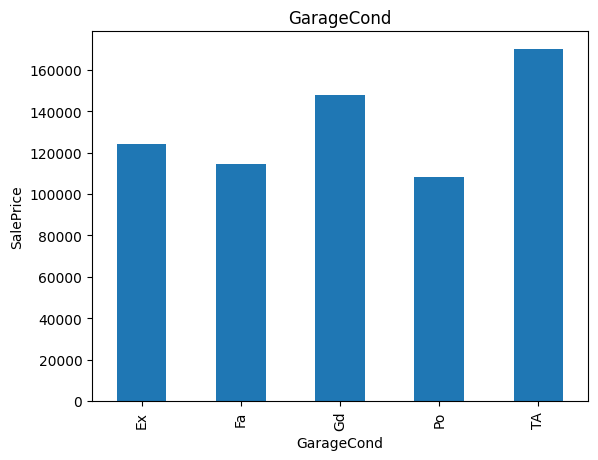

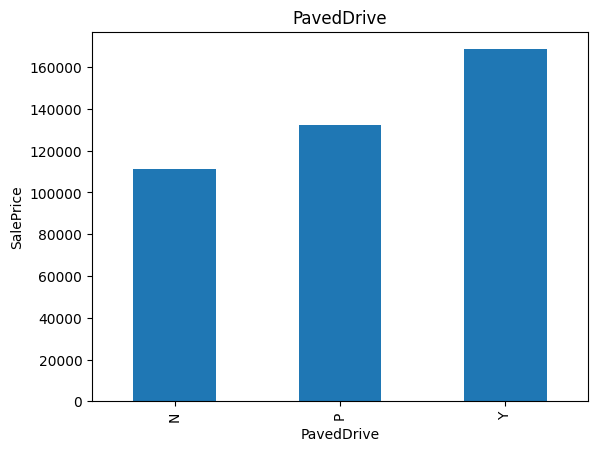

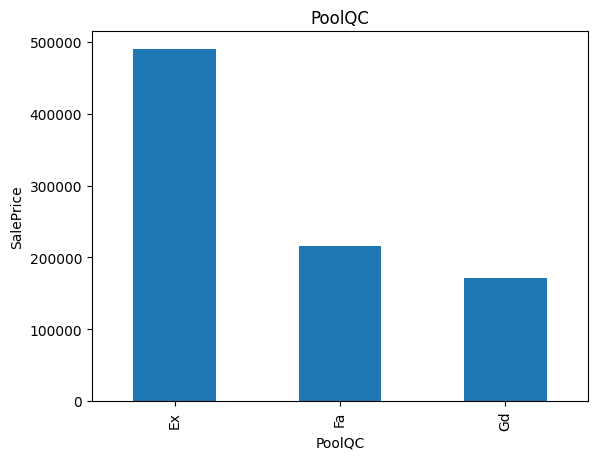

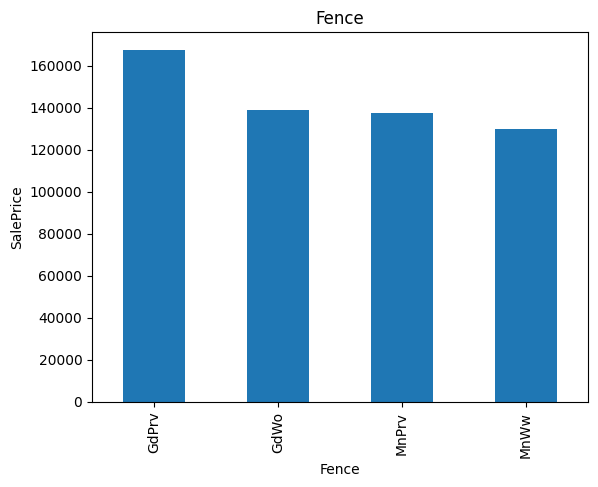

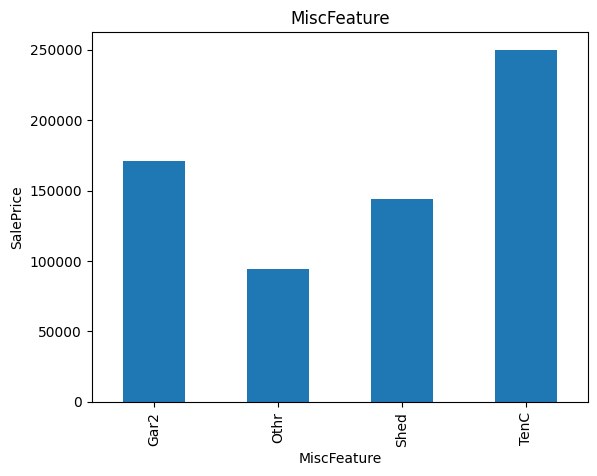

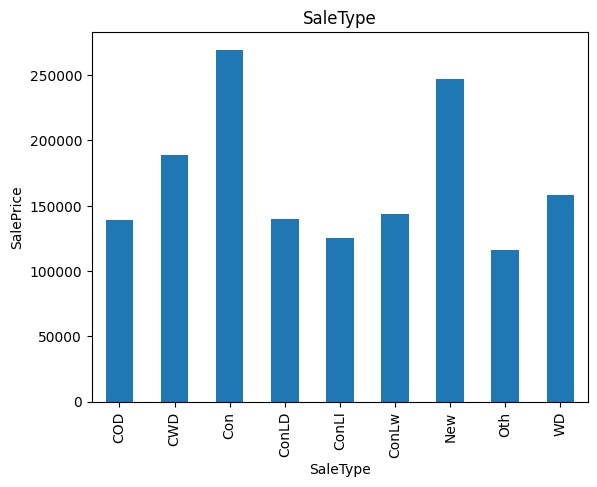

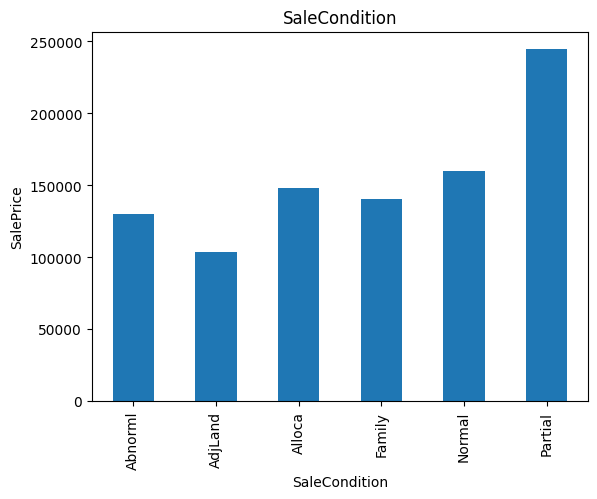

In [63]:
for feature in categorical_features:
    data = train_df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [64]:
# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_df.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice']).dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

C:\Users\Spoorti\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0              Id  4.123920e+00
1      MSSubClass  4.825027e+00
2     LotFrontage  1.731328e+01
3         LotArea  3.458622e+00
4     OverallQual  7.333709e+01
5     OverallCond  4.966217e+01
6       YearBuilt  2.467113e+04
7    YearRemodAdd  2.452604e+04
8      MasVnrArea  1.944771e+00
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
13       1stFlrSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
16      GrLivArea           inf
17   BsmtFullBath  3.658149e+00
18   BsmtHalfBath  1.215101e+00
19       FullBath  2.876728e+01
20       HalfBath  3.594813e+00
21   BedroomAbvGr  3.381667e+01
22   KitchenAbvGr  4.207555e+01
23   TotRmsAbvGrd  8.375455e+01
24     Fireplaces  3.028219e+00
25    GarageYrBlt  2.686365e+04
26     GarageCars  3.985939e+01
27     GarageArea  3.522618e+01
28     WoodDeckSF  1.945753e+00
29    OpenPorchSF  1.965951e+00
30  Encl

Strong Predictors: LotFrontage, MasVnrArea, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea are strong predictors of SalePrice. These features should be considered important in any predictive model.

Moderate Predictors: LotArea, BsmtFinSF1, 2ndFlrSF, WoodDeckSF show a moderate relationship with SalePrice. These can also be considered in the model but might not be as influential as the strong predictors.

Weak Predictors: BsmtFinSF2, BsmtUnfSF, OpenPorchSF, EnclosedPorch, ScreenPorch have weak or no clear relationship with SalePrice. These features might have less impact on the model's performance.

To improve the prediction accuracy of your models, focus on the features with high positive correlations with SalePrice. Features like OverallQual, GrLivArea, GarageCars, GarageArea, and TotalBsmtSF should be given more importance in your model.

In [65]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [66]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [67]:
test_df.shape

(1459, 80)

We see that there are 79 features

In [68]:
# Checking the null values
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

3.DATA CLEANING


3.1 HANDLING MISSING VALUES

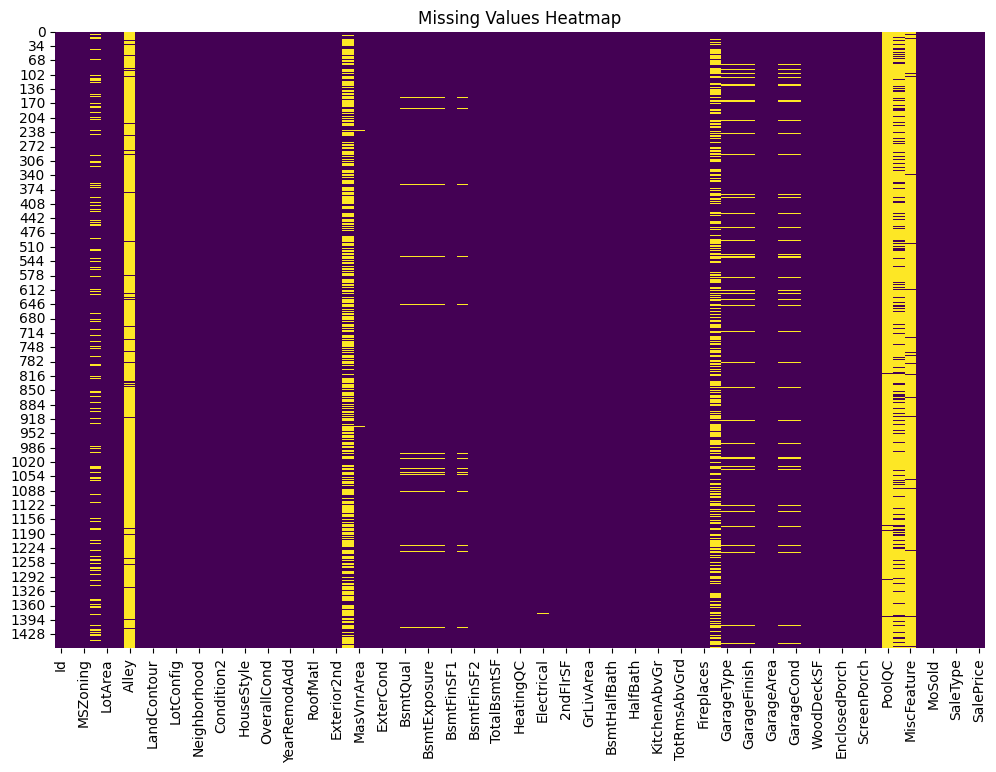

In [69]:
# Visualizing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

We will be replacing the null values with mode for categorical values and year variables.

We will be replacing the null values with median for discrete numerical values.

We will be replacing the null values with mean for continous numerical values.

We will delete columns with more than 50% null values as the available information add no value for our model.

In [70]:
# Handle missing values for categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_features:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True) 
    
    
# Handling missing values for discrete variables
for col in discrete_features:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)
    
    
for feature in year_features:
    train_df[feature] = train_df[feature].fillna(train_df[feature].mode()[0])  #train
    test_df[feature] = test_df[feature].fillna(test_df[feature].mode()[0])  #test 
    
# as sales price is absent in test data so we want to remove it from the feature list
continous_numerical_features = [feature for feature in continous_features if feature not in 'SalePrice']

# Handling missing values for continuous variables
for col in continous_numerical_features:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)


# Drop unnecessary features
features_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df.drop(columns=features_to_drop, inplace=True)
test_df.drop(columns=features_to_drop, inplace=True)


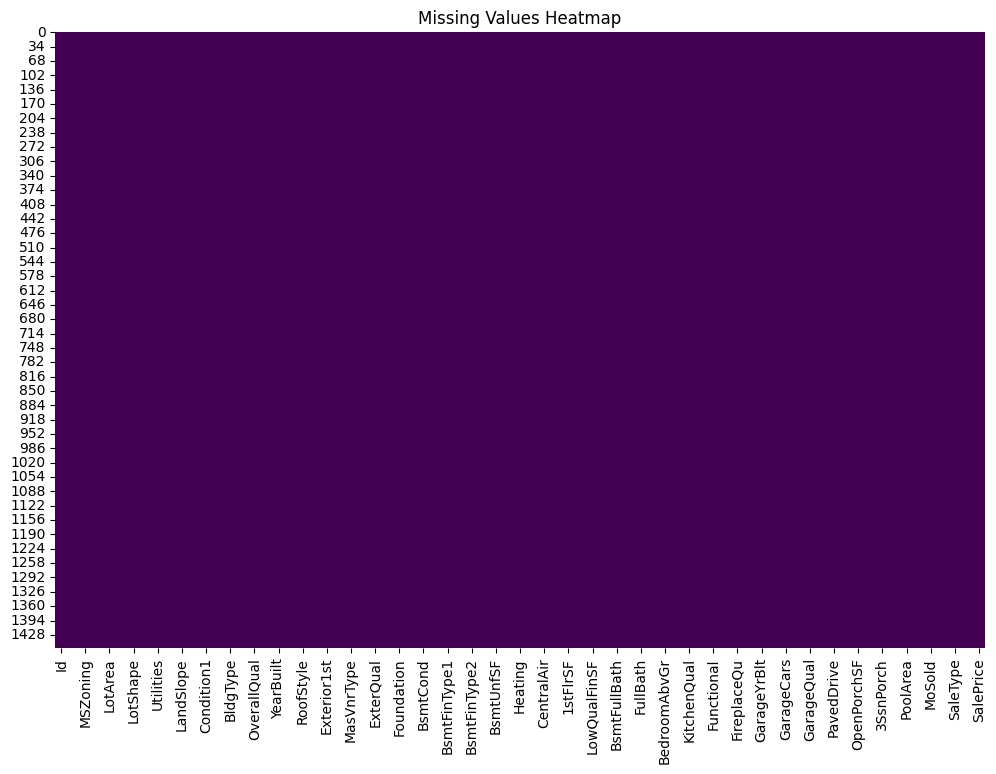

In [71]:
# Visualizing missing values
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

4.FEATURE ENGINEERING

4.1 Handling  categorical features

In [72]:
# Interaction Features
train_df['OverallQual_OverallCond'] = train_df['OverallQual'] * train_df['OverallCond']
test_df['OverallQual_OverallCond'] = test_df['OverallQual'] * test_df['OverallCond']

train_df['GrLivArea_TotalBsmtSF'] = train_df['GrLivArea'] * train_df['TotalBsmtSF']
test_df['GrLivArea_TotalBsmtSF'] = test_df['GrLivArea'] * test_df['TotalBsmtSF']

# Polynomial Features
train_df['OverallQual_Sq'] = train_df['OverallQual'] ** 2
test_df['OverallQual_Sq'] = test_df['OverallQual'] ** 2

train_df['GrLivArea_Sq'] = train_df['GrLivArea'] ** 2
test_df['GrLivArea_Sq'] = test_df['GrLivArea'] ** 2

# Log Transformation
train_df['GrLivArea_Log'] = np.log1p(train_df['GrLivArea'])
test_df['GrLivArea_Log'] = np.log1p(test_df['GrLivArea'])

# Binning
train_df['YearBuilt_Binned'] = pd.cut(train_df['YearBuilt'], bins=[1870, 1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=False)
test_df['YearBuilt_Binned'] = pd.cut(test_df['YearBuilt'], bins=[1870, 1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=False)

# Aggregation Features
train_df['TotalBathrooms'] = train_df['FullBath'] + 0.5 * train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath']
test_df['TotalBathrooms'] = test_df['FullBath'] + 0.5 * test_df['HalfBath'] + test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath']

# Date Features
train_df['YrSold_Year'] = train_df['YrSold']
test_df['YrSold_Year'] = test_df['YrSold']

train_df['YrSold_Month'] = train_df['YrSold'].apply(lambda x: x % 12 + 1)
test_df['YrSold_Month'] = test_df['YrSold'].apply(lambda x: x % 12 + 1)

# Encode categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Align train and test data
train_df, test_df = train_df.align(test_df, join='left', axis=1)
test_df.fillna(0, inplace=True)

# Split data
y = np.log1p(train_df['SalePrice'])  # Log-transform SalePrice
X = train_df.drop(columns=['SalePrice'])  # Drop SalePrice from features
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df.drop(columns='SalePrice', errors='ignore'))







here we have tried with more than one model->SVM,Rnadom Forest Regression,Linear Regression,XGBoost,LightGBM,Catboost and stacking regression.

Training and evaluating.

dataset is divided into training and validation set

In [80]:
# Train and evaluate SVM regression
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
svr_val_predictions = svr.predict(X_val_scaled)
svr_mse = mean_squared_error(y_val, svr_val_predictions)
print(f'SVM Validation Mean Squared Error: {svr_mse}')

# Train and evaluate Random Forest regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_val_predictions = rf.predict(X_val)
rf_mse = mean_squared_error(y_val, rf_val_predictions)
print(f'Random Forest Validation Mean Squared Error: {rf_mse}')

# Train and evaluate Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_val_predictions = lr.predict(X_val)
lr_mse = mean_squared_error(y_val, lr_val_predictions)
print(f'Linear Regression Validation Mean Squared Error: {lr_mse}')

# Train and evaluate XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
xgb_val_predictions = xgb_model.predict(X_val)
xgb_mse = mean_squared_error(y_val, xgb_val_predictions)
print(f'XGBoost Validation Mean Squared Error: {xgb_mse}')

# # Train and evaluate LightGBM
# lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05)
# lgb_model.fit(X_train, y_train)
# lgb_val_predictions = lgb_model.predict(X_val)
# lgb_mse = mean_squared_error(y_val, lgb_val_predictions)
# print(f'LightGBM Validation Mean Squared Error: {lgb_mse}')

# Train and evaluate CatBoost
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.05, verbose=100)
cat_model.fit(X_train, y_train)
cat_val_predictions = cat_model.predict(X_val)
cat_mse = mean_squared_error(y_val, cat_val_predictions)
print(f'CatBoost Validation Mean Squared Error: {cat_mse}')

# Train and evaluate Stacking regression
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='rbf')),
    ('lr', LinearRegression())
]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor())
stacking_model.fit(X_train, y_train)
stacking_val_predictions = stacking_model.predict(X_val)
stacking_mse = mean_squared_error(y_val, stacking_val_predictions)
print(f'Stacking Validation Mean Squared Error: {stacking_mse}')


SVM Validation Mean Squared Error: 0.047881221428465195
Random Forest Validation Mean Squared Error: 0.020804235870276223
Linear Regression Validation Mean Squared Error: 0.015447860933441053
XGBoost Validation Mean Squared Error: 0.020514338287648544
0:	learn: 0.3781534	total: 143ms	remaining: 2m 23s
100:	learn: 0.1062182	total: 620ms	remaining: 5.52s
200:	learn: 0.0837006	total: 1.09s	remaining: 4.33s
300:	learn: 0.0710375	total: 1.51s	remaining: 3.51s
400:	learn: 0.0605696	total: 1.93s	remaining: 2.89s
500:	learn: 0.0531677	total: 2.41s	remaining: 2.4s
600:	learn: 0.0463358	total: 2.83s	remaining: 1.88s
700:	learn: 0.0401550	total: 3.25s	remaining: 1.39s
800:	learn: 0.0351445	total: 3.71s	remaining: 921ms
900:	learn: 0.0307800	total: 4.13s	remaining: 454ms
999:	learn: 0.0273522	total: 4.55s	remaining: 0us
CatBoost Validation Mean Squared Error: 0.015643046301624185
Stacking Validation Mean Squared Error: 0.01727911188371112


since Linear regression model and CatBoost provide with almost same Mean Squared Error, we shall proceed with CatBoost because it can capture complex relationships and robust to overfitting.

CATBOOST MODEL

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.1, 10)
    }
    model = CatBoostRegressor(**params, verbose=0)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print(f'Best parameters: {study.best_params}')
print(f'Best MSE: {study.best_value}')



[I 2024-08-05 23:44:29,541] A new study created in memory with name: no-name-74721d9c-a4ef-4513-932c-90bc32e4899e
C:\Users\Spoorti\AppData\Local\Temp\ipykernel_10808\1732631897.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
C:\Users\Spoorti\AppData\Local\Temp\ipykernel_10808\1732631897.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
C:\Users\Spoorti\AppData\Local\Temp\ipykernel_10808\1732631897.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

HYPERPARAMETER TUNING WITH K VALIDATION 

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-3, 10),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.1, 10)
    }
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model = CatBoostRegressor(**params, verbose=0)
        model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), early_stopping_rounds=100)
        y_pred = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred)
        mse_scores.append(mse)
    return np.mean(mse_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

print(f'Best parameters: {study.best_params}')
print(f'Best MSE: {study.best_value}')


[I 2024-08-05 22:05:37,387] A new study created in memory with name: no-name-0bec7849-7ee9-4f9f-be69-9af54d068e9b
C:\Users\Spoorti\AppData\Local\Temp\ipykernel_10808\2686788338.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
C:\Users\Spoorti\AppData\Local\Temp\ipykernel_10808\2686788338.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
C:\Users\Spoorti\AppData\Local\Temp\ipykernel_10808\2686788338.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

Best parameters: {'iterations': 1713, 'learning_rate': 0.019585163803416322, 'depth': 5, 'l2_leaf_reg': 0.024502515237598593, 'border_count': 244, 'random_strength': 9.994675344349844, 'bagging_temperature': 0.33335486467464504}
Best MSE: 0.013116839606646665


In [ ]:
# Train the final model with best parameters
best_params = study.best_params
final_model = CatBoostRegressor(**best_params)
final_model.fit(X, y)

# Predict on test data
test_predictions = final_model.predict(test_df.drop(columns='SalePrice', errors='ignore'))

# Save predictions to CSV file
output_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': np.expm1(test_predictions)})
output_df.to_csv('sample_submission.csv', index=False)

print('Predictions saved to sample_submission.csv')

0:	learn: 0.3948001	total: 3.19ms	remaining: 5.47s
1:	learn: 0.3908881	total: 6.17ms	remaining: 5.28s
2:	learn: 0.3869338	total: 9ms	remaining: 5.13s
3:	learn: 0.3828611	total: 14.2ms	remaining: 6.08s
4:	learn: 0.3796181	total: 17.2ms	remaining: 5.88s
5:	learn: 0.3761769	total: 20ms	remaining: 5.69s
6:	learn: 0.3719156	total: 22.8ms	remaining: 5.56s
7:	learn: 0.3685292	total: 25.4ms	remaining: 5.42s
8:	learn: 0.3644676	total: 29.5ms	remaining: 5.58s
9:	learn: 0.3612778	total: 32.4ms	remaining: 5.51s
10:	learn: 0.3579328	total: 35.1ms	remaining: 5.43s
11:	learn: 0.3551636	total: 37.6ms	remaining: 5.33s
12:	learn: 0.3528173	total: 40.3ms	remaining: 5.27s
13:	learn: 0.3493435	total: 43.4ms	remaining: 5.26s
14:	learn: 0.3461334	total: 47.7ms	remaining: 5.41s
15:	learn: 0.3434301	total: 51.2ms	remaining: 5.43s
16:	learn: 0.3402827	total: 54ms	remaining: 5.39s
17:	learn: 0.3366252	total: 56.7ms	remaining: 5.34s
18:	learn: 0.3337997	total: 60.2ms	remaining: 5.37s
19:	learn: 0.3306232	total: 6